## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
dataset = pd.read_csv('datasets/crimes_against_women_2001-2014.csv')
dataset.head(5)

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [9]:
dataset.shape

(10677, 11)

In [3]:
dataset.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

## Data Exploration and Visualization

Question 1: How rape cases were reported each year from 2001 to 2014?

In [4]:
rape_cases = pd.DataFrame(dataset.groupby('Year')['Rape'].sum())
rape_cases

,Rape
Year,
2001,32150
2002,32746
2003,31694
2004,36466
2005,36718
2006,38696
2007,41474
2008,42934
2009,42794


<AxesSubplot:xlabel='Year', ylabel='Rape'>

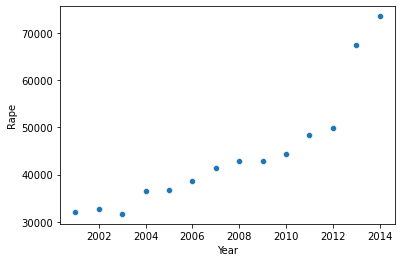

In [5]:
sns.scatterplot(data=rape_cases, x='Year', y='Rape')

Question 2: How does the dowry deaths and kidnapping and abduction vary between each states?

In [6]:
crime_state = pd.DataFrame(dataset.groupby('STATE/UT').sum())
crime_state = crime_state.loc[:, ['Dowry Deaths', 'Kidnapping and Abduction']]
crime_state

,Dowry Deaths,Kidnapping and Abduction
STATE/UT,,
A & N ISLANDS,12,154
A & N Islands,6,34
A&N Islands,2,24
ANDHRA PRADESH,12430,29872
ARUNACHAL PRADESH,4,1116
...,...,...
UTTARAKHAND,1812,4668
Uttar Pradesh,9608,40726
Uttarakhand,162,1816


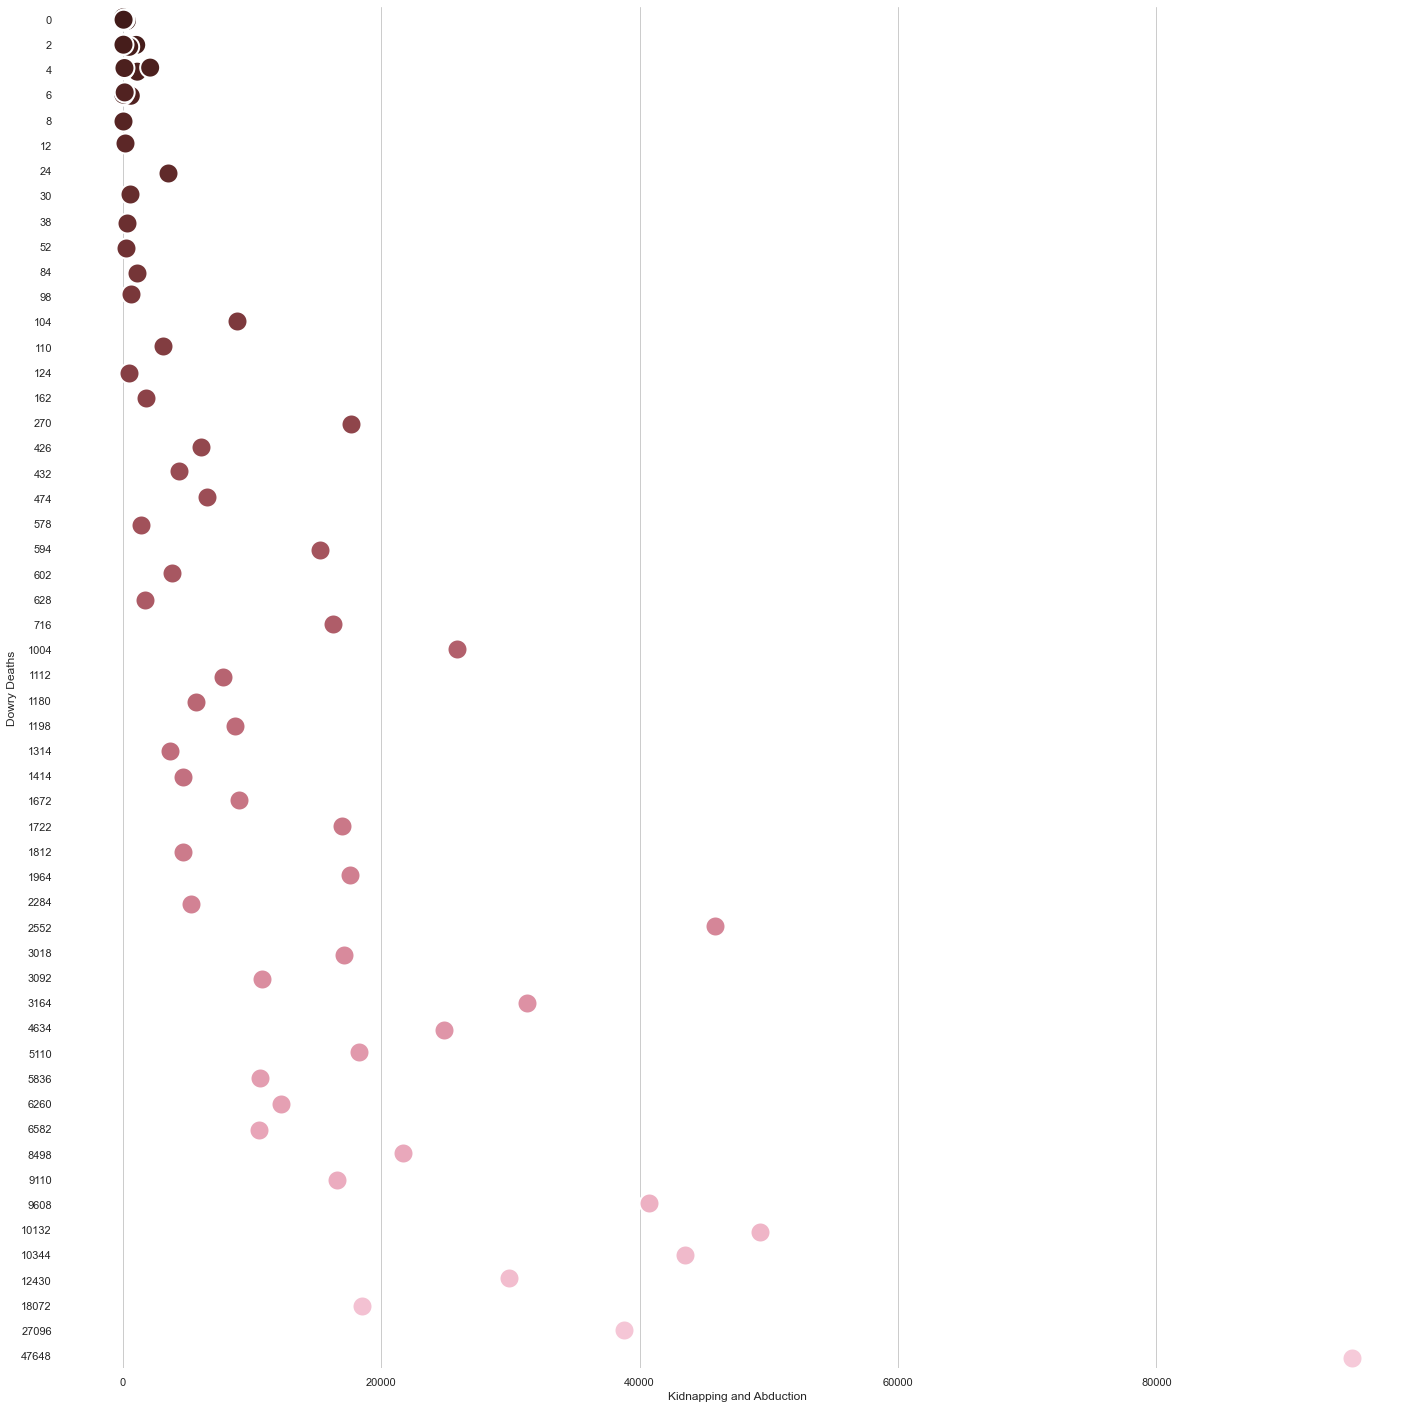

In [7]:
sns.set(style='whitegrid')
g = sns.PairGrid(crime_state, x_vars=crime_state.columns[1], y_vars=crime_state.columns[0], height=20)
sns.despine(left=True, bottom=True)
g.map(sns.stripplot, size=20, orient="h", palette="ch:s=1,r=-.1,h=1_r", linewidth=2, edgecolor="w")
plt.show()